In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
import surfdist as sd
from surfdist import load, analysis, viz, utils
import scipy.spatial


In [2]:
cmap='coolwarm'
# create the base directory
base_dir = '/Users/medaglialab/Desktop/geodesic_distance/' 
# read in the FS geometry file
surf = nib.freesurfer.read_geometry(os.path.join(base_dir, 'Freesurfer_subjects/DP5.SC.1.001/surf/lh.pial'))
# load the cortical label
cort = np.sort(nib.freesurfer.read_label(os.path.join(base_dir, 'Freesurfer_subjects/DP5.SC.1.001/label/lh.cortex.label')))
# load the morphometry data
sulc=nib.freesurfer.read_morph_data(os.path.join(base_dir, 'Freesurfer_subjects/DP5.SC.1.001/surf/lh.sulc'))
# load the source nodes
source_nodes  = sd.load.load_freesurfer_label(os.path.join(base_dir, 'TNI009_DP5001/lh_parc_result.annot'), '17Networks_14')

In [3]:
dist = sd.analysis.dist_calc(surf, cort, source_nodes)

/Users/medaglialab/Documents/GitHub/surfdist/surfdist/utils.py:4: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "surf_keep_cortex" failed type inference due to: non-precise type pyobject
[1] During: typing of argument at /Users/medaglialab/Documents/GitHub/surfdist/surfdist/utils.py (20)

File "surfdist/utils.py", line 20:
def surf_keep_cortex(surf, cortex):
    <source elided>
    # split surface into vertices and triangles
    vertices, triangles = surf
    ^

  @numba.jit(parallel=True)
/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:742: NumbaWarning: Function "surf_keep_cortex" was compiled in object mode without forceobj=True.

File "surfdist/utils.py", line 5:
@numba.jit(parallel=True)
def surf_keep_cortex(surf, cortex):
^

  self.func_ir.loc))
/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:751: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation pat

In [5]:
dist

array([52.17030005, 51.70970928, 52.65622176, ..., 39.55994705,
       40.10551362, 42.28295865])

(array([68601., 29910., 18714., 14352.,  9937.,  7539.,  5698.,  4320.,
         2681.,   841.]),
 array([ 0.        ,  8.47332017, 16.94664034, 25.41996051, 33.89328068,
        42.36660085, 50.83992102, 59.31324119, 67.78656136, 76.25988153,
        84.7332017 ]),
 <a list of 10 Patch objects>)

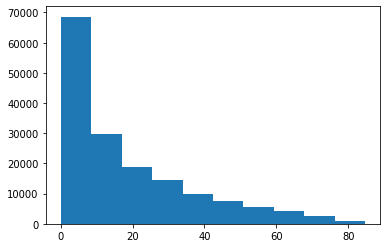

In [6]:
plt.hist(dist)

# Calculate distance matrix from list of nodes

In [7]:

surf = nib.freesurfer.read_geometry(os.path.join(base_dir, 'Freesurfer_subjects/DP5.SC.1.001/surf/lh.pial'))
cortex = np.sort(nib.freesurfer.read_label(os.path.join(base_dir, 'Freesurfer_subjects/DP5.SC.1.001/label/lh.cortex.label')))
sulc=nib.freesurfer.read_morph_data(os.path.join(base_dir, 'Freesurfer_subjects/DP5.SC.1.001/surf/lh.sulc'))

#annot_input = '/Users/medaglialab/Desktop/geodesic_distance/TNI009_DP5001/lh_parc_result.annot'
#label_name = '17Networks_14'
labels = '/Users/medaglialab/Desktop/geodesic_distance/TNI009_DP5001/lh_parc_result.annot'

In [8]:
dist = sd.analysis.dist_calc_matrix(surf, cortex, labels)

# of regions: 36


ValueError: b'NONE' is not in list

In [ ]:
sd.load.load_freesurfer_label(labels, '17Networks_14')